# Stock price prediction

In [62]:
import math
import time
import pandas as pd
import sklearn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
# Adjusting the size of matplotlib
mpl.rc('figure', figsize=(8, 15))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Displaying plots right in the notebook
%matplotlib inline

In [2]:
raw_df = pd.read_csv('SCAM.L.csv')  # gotta love that ticker name! ;P

In [3]:
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-02,244.0,246.000000,243.500000,244.75,242.844986,105487
1,2014-09-03,245.5,247.770004,244.873001,245.00,243.093033,109929
2,2014-09-04,247.0,248.278000,245.875000,246.50,244.581360,86113
3,2014-09-05,246.5,247.917999,244.750000,245.25,243.341064,92304
4,2014-09-08,247.0,247.000000,244.500000,244.50,242.596924,127314


In [4]:
raw_df.shape

(1265, 7)

In [5]:
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,304.315845,305.975195,302.393086,303.988092,301.637798,84415.116206
std,79.167592,79.304194,78.908577,79.102113,78.502367,59964.535939
min,3.733000,3.733000,3.733000,3.733000,3.705086,0.000000
25%,256.000000,257.217987,253.824997,255.000000,253.015182,51536.000000
50%,318.750000,320.839996,316.250000,317.500000,315.028748,71965.000000
75%,365.000000,366.000000,363.000000,364.000000,361.222809,102925.000000
max,426.908997,426.908997,424.980011,425.000000,421.821991,676484.000000


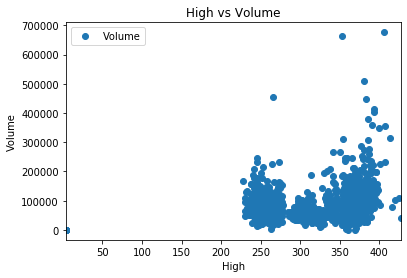

In [6]:
raw_df.plot(x='High', y='Volume', style='o')  
plt.title('High vs Volume')  
plt.xlabel('High')  
plt.ylabel('Volume')  
plt.show()

In [7]:
no_vol = raw_df[raw_df.Volume == 0]

In [8]:
len(no_vol)

48

In [9]:
df = raw_df.drop(no_vol.index, axis=0, inplace=False)

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-02,244.0,246.000000,243.500000,244.75,242.844986,105487
1,2014-09-03,245.5,247.770004,244.873001,245.00,243.093033,109929
2,2014-09-04,247.0,248.278000,245.875000,246.50,244.581360,86113
3,2014-09-05,246.5,247.917999,244.750000,245.25,243.341064,92304
4,2014-09-08,247.0,247.000000,244.500000,244.50,242.596924,127314


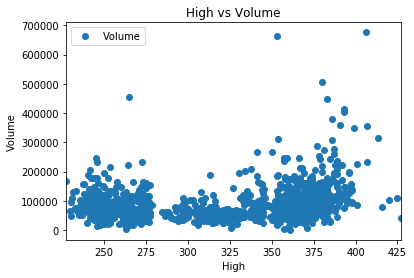

In [11]:
df.plot(x='High', y='Volume', style='o')  
plt.title('High vs Volume')  
plt.xlabel('High')  
plt.ylabel('Volume')  
plt.show()

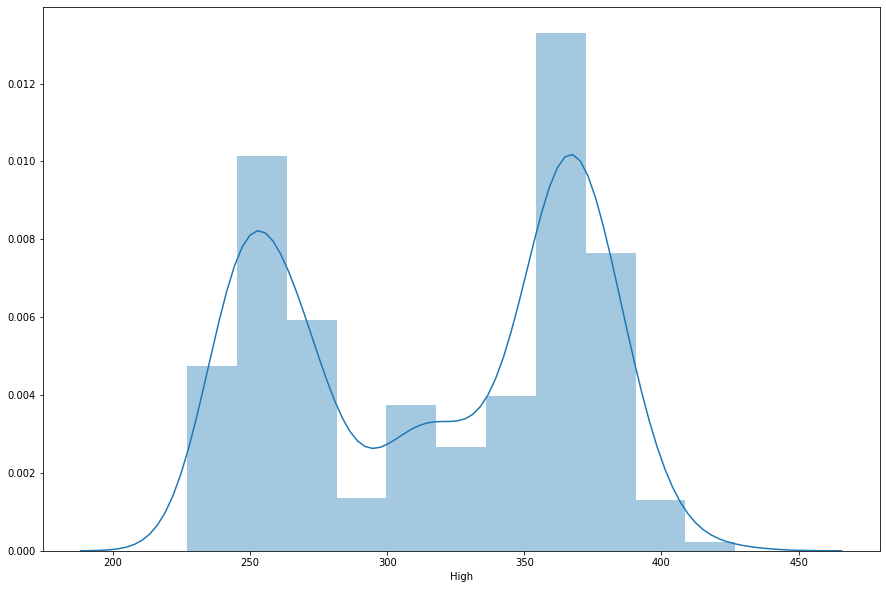

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['High'])

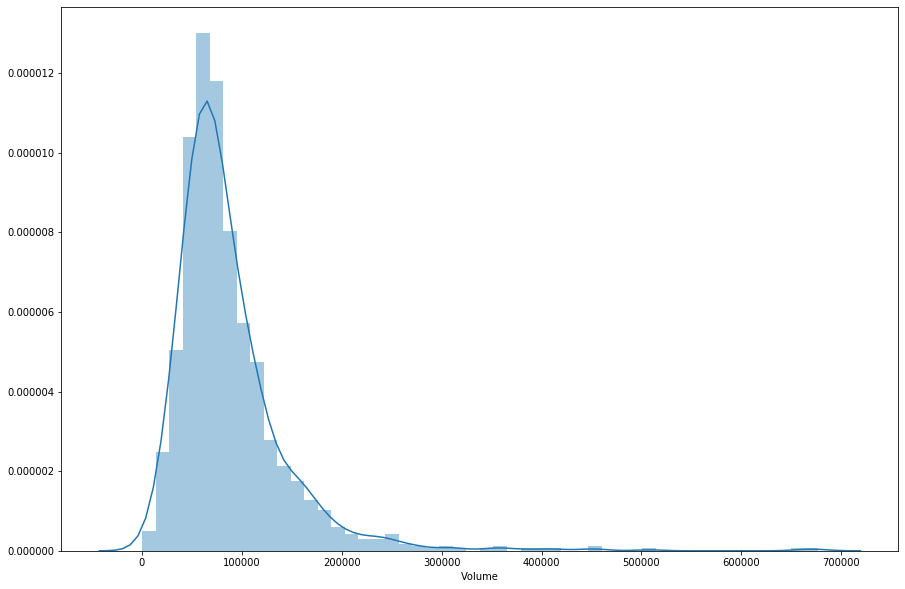

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Volume'])

In [14]:
no_vol.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
817,2017-11-22,368.7500,368.7500,368.7500,368.7500,365.879791,0
1201,2019-06-04,3.7330,3.7330,3.7330,3.7330,3.705086,0
1202,2019-06-05,3.7448,3.7448,3.7448,3.7448,3.716798,0
1203,2019-06-06,3.7659,3.7659,3.7659,3.7659,3.737740,0
1214,2019-06-21,3.9139,3.9139,3.9139,3.9139,3.884633,0
1215,2019-06-24,3.9182,3.9182,3.9182,3.9182,3.888901,0
1217,2019-06-26,3.8994,3.8994,3.8994,3.8994,3.870242,0
1218,2019-06-27,3.9066,3.9066,3.9066,3.9066,3.877388,0
1220,2019-07-01,3.9596,3.9596,3.9596,3.9596,3.929991,0
1221,2019-07-02,3.9856,3.9856,3.9856,3.9856,3.955797,0


# Let's get this done

In [15]:
raw_df.set_index('Date', inplace=True)
raw_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-02,244.0,246.000000,243.500000,244.75,242.844986,105487
2014-09-03,245.5,247.770004,244.873001,245.00,243.093033,109929
2014-09-04,247.0,248.278000,245.875000,246.50,244.581360,86113
2014-09-05,246.5,247.917999,244.750000,245.25,243.341064,92304
2014-09-08,247.0,247.000000,244.500000,244.50,242.596924,127314


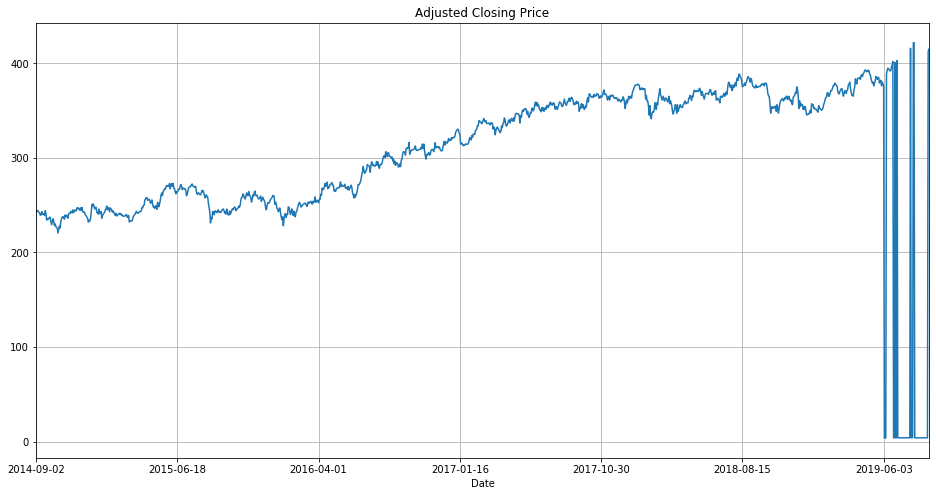

In [16]:
raw_df['Adj Close'].plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

There's clearly been some weird sh%t going down towards the end, probably with price closures due to (to me unknown) events that prevented trading for those days and thus seems to have thrown the Adjusted Closing Price to `0`. Let's check this out in more detail.

In [17]:
nulls = raw_df[raw_df['Adj Close'] == 0]

In [18]:
nulls

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Nope, nothing going all the way to 0 apparently, but these drops are significant. So let's check again, a bit more relaxed:

In [19]:
lows = raw_df[raw_df['Adj Close'] <= 100]

In [20]:
lows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-04,3.73300,3.73300,3.73300,3.73300,3.705086,0
2019-06-05,3.74480,3.74480,3.74480,3.74480,3.716798,0
2019-06-06,3.76590,3.76590,3.76590,3.76590,3.737740,0
2019-06-21,3.91390,3.91390,3.91390,3.91390,3.884633,0
2019-06-24,3.91820,3.91820,3.91820,3.91820,3.888901,0
2019-06-26,3.89940,3.89940,3.89940,3.89940,3.870242,0
2019-06-27,3.90660,3.90660,3.90660,3.90660,3.877388,0
2019-07-01,3.95960,3.95960,3.95960,3.95960,3.929991,0
2019-07-02,3.98560,3.98560,3.98560,3.98560,3.955797,0


In [21]:
len(lows)

47

Clearly it seems that all of these low values have an associated trading volume of `0`. Proof:

In [22]:
len(lows) == len(lows[lows['Volume'] == 0])

True

There are some valid reasons for the Trading Volume of a stock falling to `0` - read up more on it [here](https://pocketsense.com/causes-companys-stock-volume-zero-12080944.html).

However, since they are all gathered towards the end of the time series and since this is a toy project for learning purposes that no one will ever look at seriously, I'll disregard these anomalies and limit my predictions to the time before these crazy events. :)

In [25]:
df = raw_df[raw_df.Volume != 0]

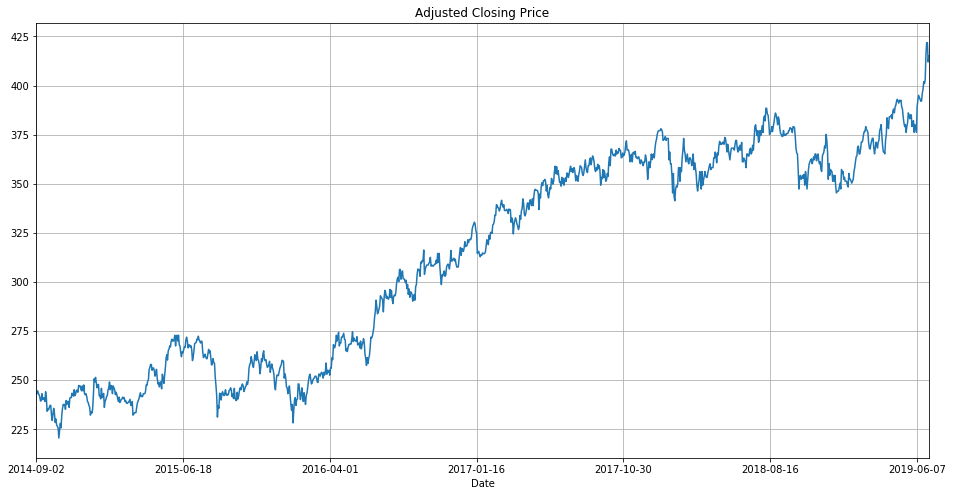

In [26]:
df['Adj Close'].plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

Alright-o! Here we go, that looks more like something to work with.

## Calculating the Moving Average

In [27]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [28]:
mavg

Date
2014-09-02           NaN
2014-09-03           NaN
2014-09-04           NaN
2014-09-05           NaN
2014-09-08           NaN
                 ...    
2019-07-25    379.435355
2019-07-31    380.130660
2019-08-01    380.786270
2019-08-30    381.323813
2019-09-02    381.861585
Name: Adj Close, Length: 1217, dtype: float64

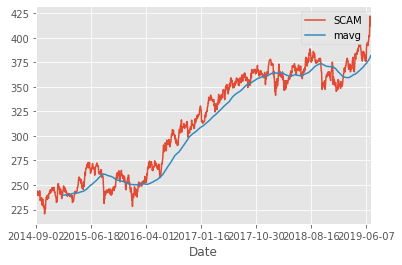

In [36]:
close_px.plot(label='SCAM')
mavg.plot(label='mavg')
plt.legend()

## Feature Engineering

In [39]:
dfreg = df.loc[:,['Adj Close','Volume']]
# (High - Low) / Closing Price
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# (Close - Open) / Open Price
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [40]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2014-09-02,242.844986,105487,1.021450,0.307377
2014-09-03,243.093033,109929,1.182450,-0.203666
2014-09-04,244.581360,86113,0.974848,-0.202429
2014-09-05,243.341064,92304,1.291743,-0.507099
2014-09-08,242.596924,127314,1.022495,-1.012146


## Data Preparation

In [44]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = sklearn.preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

## Prediction Time

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [47]:
# initialize test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [49]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [50]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [51]:
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9667966024349809
0.9668020371915979
0.9679845363394711
0.9327607846989684


In [84]:
# change this out for the different classifiers
clf = clfreg

In [85]:
forecast_set = clf.predict(X_lately)
dfreg['Forecast'] = np.nan

In [87]:
last_date

Timestamp('2019-09-15 00:00:00')

In [90]:
dfreg.tail(20)

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2019-06-25,400.979034,356787.0,0.990099,-0.246914,NaN,NaN
2019-06-28,402.964081,231109.0,0.492611,0.246914,NaN,NaN
2019-07-25,415.866882,100984.0,0.238663,-0.238095,NaN,NaN
2019-07-31,421.821991,42447.0,0.453879,-0.447167,NaN,NaN
2019-08-01,421.821991,108419.0,0.571763,0.472813,NaN,NaN
2019-08-30,412.000000,313076.0,1.538834,0.000000,NaN,NaN
2019-09-02,415.000000,77341.0,0.884340,0.484262,NaN,NaN
2019-09-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df = dfreg.copy()

In [105]:
# reset df
dfreg = dfreg[pd.notnull(dfreg['Volume'])]

In [106]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2019-07-25,415.866882,100984.0,0.238663,-0.238095,NaN,NaN
2019-07-31,421.821991,42447.0,0.453879,-0.447167,NaN,NaN
2019-08-01,421.821991,108419.0,0.571763,0.472813,NaN,NaN
2019-08-30,412.000000,313076.0,1.538834,0.000000,NaN,NaN
2019-09-02,415.000000,77341.0,0.884340,0.484262,NaN,NaN


## Prediction using the Linear regression trained classifier

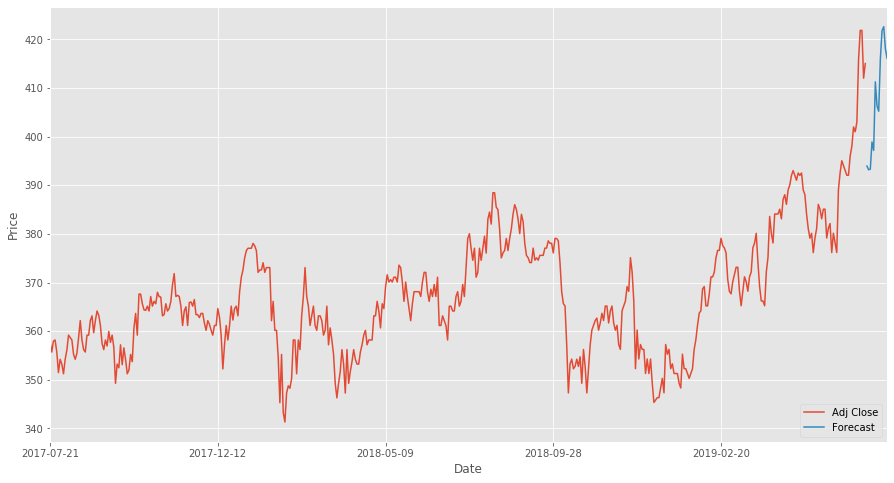

In [104]:
mpl.rc('figure', figsize=(15, 8))

last_date = dfreg.iloc[-1].name
last_unix = datetime.datetime.strptime(last_date, "%Y-%m-%d")
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Let's generalize this for easier use..

In [107]:
def plot_prediction(clf, df):
    mpl.rc('figure', figsize=(15, 8))
    
    # make a df copy
    dfreg = df.copy()
    forecast_set = clf.predict(X_lately)
    dfreg['Forecast'] = np.nan
    
    last_date = dfreg.iloc[-1].name
    last_unix = datetime.datetime.strptime(last_date, "%Y-%m-%d")
    next_unix = last_unix + datetime.timedelta(days=1)

    for i in forecast_set:
        next_date = next_unix
        next_unix += datetime.timedelta(days=1)
        dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

## Prediction using the Polynomial 2 trained classifier

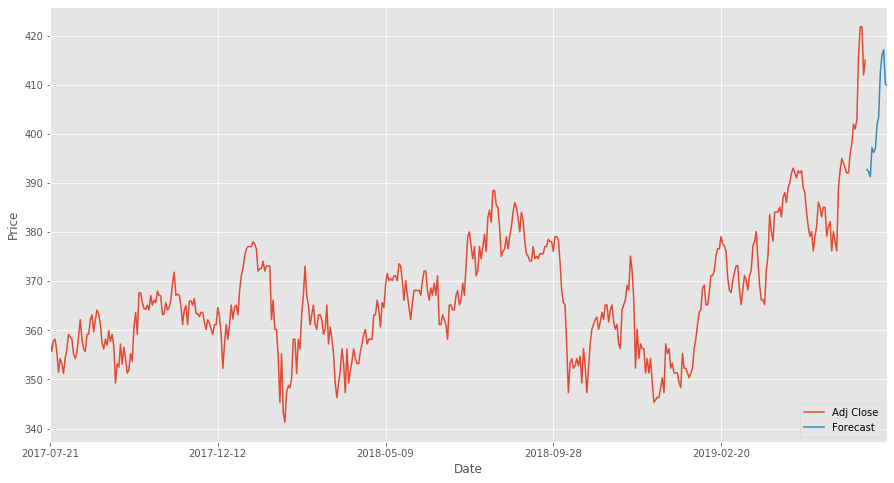

In [109]:
plot_prediction(clfpoly2, df)

## Prediction using the Polynomial 3 trained classifier

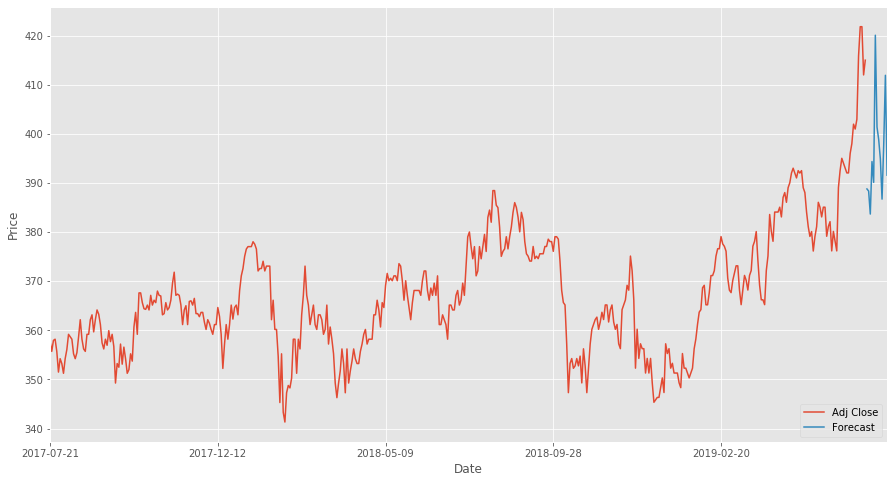

In [110]:
plot_prediction(clfpoly3, df)

## Prediction using the KNN trained classifier

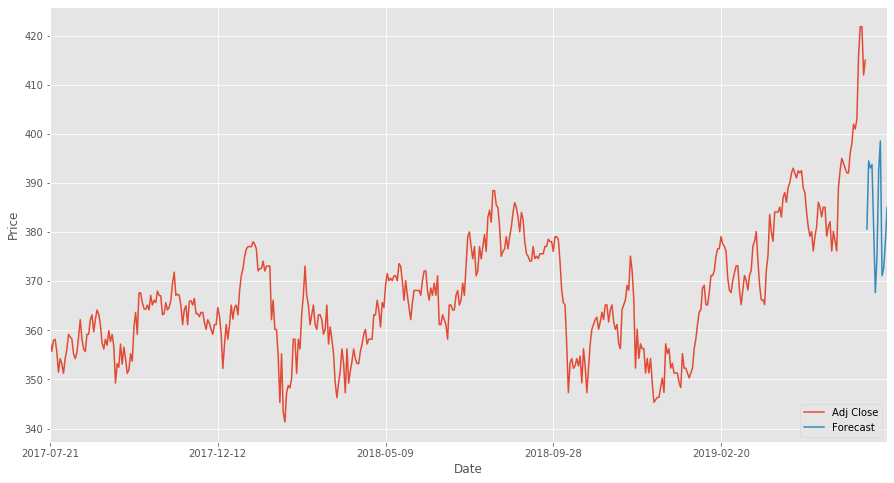

In [113]:
plot_prediction(clfknn, df)